# Importing Libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Raw Dataset:

In [2]:
data = pd.read_excel('CustomerChurn.xlsx')
data

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# I. Data Cleansing

## 1.1. Checking Data Types

In [3]:
data.dtypes

# Total Charges should be classified as number, but here it is misclassified as string
# Other variables have correct types

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

## 1.2. Fixing incorrect data types and values

In [4]:
df = data.copy()

### 1.2.1. Data types

In [5]:
# Fix Total charges

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')
df['Total Charges'].dtypes

# Now Total Charges is in correct format

dtype('float64')

### 1.2.2. Values

#### 1.2.2.1. Categorical variables

In [6]:
# Isolate categorical attributes

cat = df.drop(labels = ['LoyaltyID', 'Customer ID', 'Tenure', 'Monthly Charges', 'Total Charges'], axis = 1)

In [7]:
# Check for the unique values of categorical attributes

for col in cat:
    print(col,':', cat[col].unique(),"-->", cat[col].nunique(), 'values')
    
# Turns out that there is no redundant or unusual value in categorical variables

Senior Citizen : ['No' 'Yes'] --> 2 values
Partner : ['Yes' 'No'] --> 2 values
Dependents : ['No' 'Yes'] --> 2 values
Phone Service : ['No' 'Yes'] --> 2 values
Multiple Lines : ['No phone service' 'No' 'Yes'] --> 3 values
Internet Service : ['DSL' 'Fiber optic' 'No'] --> 3 values
Online Security : ['No' 'Yes' 'No internet service'] --> 3 values
Online Backup : ['Yes' 'No' 'No internet service'] --> 3 values
Device Protection : ['No' 'Yes' 'No internet service'] --> 3 values
Tech Support : ['No' 'Yes' 'No internet service'] --> 3 values
Streaming TV : ['No' 'Yes' 'No internet service'] --> 3 values
Streaming Movies : ['No' 'Yes' 'No internet service'] --> 3 values
Contract : ['Month-to-month' 'One year' 'Two year'] --> 3 values
Paperless Billing : ['Yes' 'No'] --> 2 values
Payment Method : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] --> 4 values
Churn : ['No' 'Yes'] --> 2 values


#### 1.2.2.2. Numerical variables

In [8]:
num = df[['Tenure', 'Monthly Charges', 'Total Charges']]

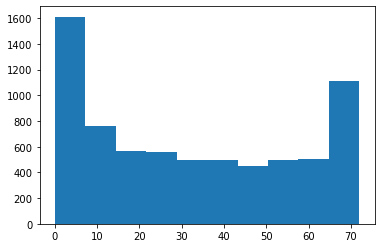

In [9]:
# Check distribution
# Tenure

num_bins = 10 #number of bins
plt.hist(num['Tenure'], bins = num_bins)
plt.show()

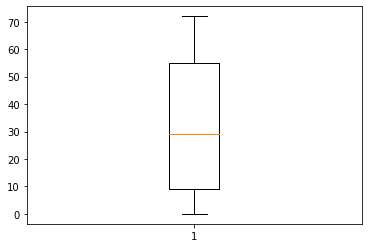

In [10]:
plt.boxplot(num['Tenure'])
plt.show()

# no outlier

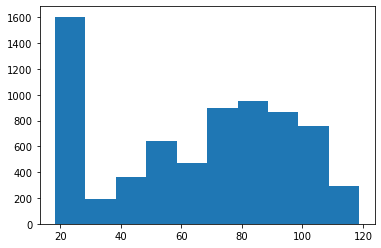

In [11]:
# Monthly Charges

plt.hist(num['Monthly Charges'], bins = num_bins)
plt.show()

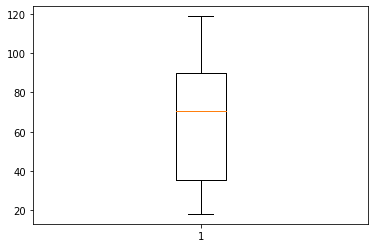

In [12]:
plt.boxplot(num['Monthly Charges'])
plt.show()

# no outlier

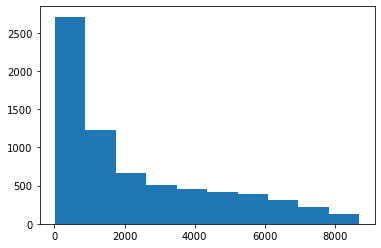

In [13]:
# Total Charges

plt.hist(num['Total Charges'], bins = num_bins)
plt.show()

# None of the variables follow normal distribution

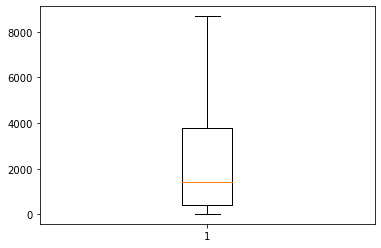

In [14]:
plt.boxplot(num['Total Charges'].dropna()) #seems like Total Charges has nulls
plt.show()

# no outlier

In [15]:
num.isnull().mean() * 100

Tenure             0.000000
Monthly Charges    0.000000
Total Charges      0.156183
dtype: float64

## 1.3. Identifying and Fixing nulls

In [16]:
df.isnull().mean()*100

# Total Charges has nulls that results from changing data type

LoyaltyID            0.000000
Customer ID          0.000000
Senior Citizen       0.000000
Partner              0.000000
Dependents           0.000000
Tenure               0.000000
Phone Service        0.000000
Multiple Lines       0.000000
Internet Service     0.000000
Online Security      0.000000
Online Backup        0.000000
Device Protection    0.000000
Tech Support         0.000000
Streaming TV         0.000000
Streaming Movies     0.000000
Contract             0.000000
Paperless Billing    0.000000
Payment Method       0.000000
Monthly Charges      0.000000
Total Charges        0.156183
Churn                0.000000
dtype: float64

In [17]:
df[df['Total Charges'].isnull()]

# Turns out rows with nulls represent new customers (shown from Tenure values of 0)
# Therefore, replace nulls with 0

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df['Total Charges'] = df['Total Charges'].fillna(0)

In [20]:
dc = df.copy().drop(labels = ['LoyaltyID', 'Customer ID'], axis = 1) 

# Drop LoyaltyID and Customer ID because they are not used in our analysis later on

In [21]:
dc.to_csv('CustomerChurn-Cleansed Dataset.csv', index = False)